# Importing necessary libraries

In [1]:
#importing all the necessary libraries
import eda as eda
import dataframe as df
import visualize as v
import train as t
import pandas as pd
import matplotlib.pyplot as plt

# Supervised Learning

## Regression technique

### Fetching Boston dataframe

In [ ]:
boston_df = df.get_boston()

### EDA

In [ ]:
boston_df = eda.del_cols(boston_df,['Unnamed: 0'])
feature_boston_df= df.get_feature_df(boston_df,['Price'])
target_boston_df = df.get_target_df(boston_df,['Price'])


In [ ]:
#checking null values and information about columns
eda.get_missing_values(boston_df)

In [ ]:
eda.get_categorical_cols(feature_boston_df)

In [ ]:
eda.get_numerical_cols(feature_boston_df)

In [ ]:
#get_lmplot(boston_df,boston_df_features,'Price') - #giving correct result 
#eda.get_heatmap(boston_df) # giving correct result for continuous target variable
eda.get_pairgrid(boston_df,feature_boston_df,target_boston_df)

### Creating Regression models

In [ ]:
num_cols, cat_cols = t.get_cols(feature_boston_df)
model,y_test,y_pred = t.model_pipeline(feature_boston_df,target_boston_df,num_cols=num_cols,cat_cols=cat_cols,task='linear_regression')

### Evaluating regression models

In [ ]:
t.evaluate_model(y_test,y_pred,'regression')

In [ ]:
v.plot_actual_vs_predicted(y_test=y_test,y_pred=y_pred)

In [ ]:
v.plot_residuals(y_test,y_pred)

In [ ]:
t.get_MAPE(y_test,y_pred)*100#finding out MAPE

In [ ]:
print(t.get_training_error(feature_boston_df,target_boston_df,num_cols, cat_cols))

In [ ]:
print(t.get_lasso_mape(1,feature_boston_df,target_boston_df))
print(t.get_ridge_mape(0.1,feature_boston_df,target_boston_df))
print(t.get_elasticnet_mape(0.001,feature_boston_df,target_boston_df))

lasso, ridge and elasticnet is worse than linear regression, hence we will continue to use linear regression

## Classification Techniques


### Fetching Churn dataset

In [2]:
churn_df = df.get_churn_df()

### EDA

In [3]:
#some EDA, removing irrelevant columns and changing the datatype of few columns
churn_df = eda.del_cols(churn_df,'customerID')
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'].values,errors='coerce')

In [4]:
#dropping null values and creating a copy of a dataframe
churn_df_new = eda.drop_null_values(churn_df)

In [5]:
#Creating target dataframe from main dataframe
target_churn_df = df.get_target_df(churn_df_new,['Churn'])

In [6]:
target_1 = target_churn_df
target_1.value_counts()

Churn
No       5163
Yes      1869
Name: count, dtype: int64

In [7]:
#creating target as 0 and 1 instead of 'Yes' and 'No' so that it will work with XGBoost 
target_1.loc[target_1['Churn']=='No']=0
target_1.loc[target_1['Churn']=='Yes']=1

C:\Users\Yash\AppData\Local\Temp\ipykernel_28124\342483088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_1.loc[target_1['Churn']=='No']=0
C:\Users\Yash\AppData\Local\Temp\ipykernel_28124\342483088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_1.loc[target_1['Churn']=='Yes']=1


In [8]:
# Creating Features from main dataframe
feature_churn_df = df.get_feature_df(churn_df_new,['Churn'])

In [9]:
num_cols = eda.get_numerical_cols(feature_churn_df)
cat_cols = eda.get_categorical_cols(feature_churn_df)

In [10]:
target_2 = target_1.copy()
target_2=target_2.replace({'Yes':1,'No':0})
target_churn_df = target_2.copy()

C:\Users\Yash\AppData\Local\Temp\ipykernel_28124\3066148092.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target_2=target_2.replace({'Yes':1,'No':0})


### KNN

In [160]:
model_knn,y_test_knn,y_pred_knn = t.model_pipeline(feature_churn_df,target_churn_df,num_cols,cat_cols,'knn')
report_knn=t.evaluate_model(y_test_knn,y_pred_knn,'knn')
print(report_knn)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1033
           1       0.53      0.50      0.52       374

    accuracy                           0.75      1407
   macro avg       0.68      0.67      0.67      1407
weighted avg       0.75      0.75      0.75      1407

{'Accuracy Score': '74.9822316986496%', 'Classification report': None}


### Decision Tree

In [161]:
model_dt,y_test_dt,y_pred_dt = t.model_pipeline(feature_churn_df,target_churn_df,num_cols,cat_cols,'decision_tree')
report_dt = t.evaluate_model(y_test_dt,y_pred_dt,'decision_tree')
print(report_dt)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1033
           1       0.47      0.47      0.47       374

    accuracy                           0.72      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.72      0.72      1407

{'Accuracy Score': '71.71286425017769%', 'Classification report': None}


### Random Forest

In [162]:
model_rf,y_test_rf,y_pred_rf = t.model_pipeline(feature_churn_df,target_churn_df,num_cols,cat_cols,'randon_forest')
report_rf = t.evaluate_model(y_test_rf,y_pred_rf,'random_forest')
print(report_rf)

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1033
           1       0.61      0.46      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407

{'Accuracy Score': '77.89623312011372%', 'Classification report': None}


### Naive Bayes

In [163]:
model_nb,y_test_nb,y_pred_nb = t.model_pipeline(feature_churn_df,target_churn_df,num_cols,cat_cols,'naive_bayes')
report_nb = t.evaluate_model(y_test_nb,y_pred_nb,'naive bayes')
print(report_nb)

              precision    recall  f1-score   support

           0       0.91      0.68      0.77      1033
           1       0.47      0.81      0.60       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.71      0.73      1407

{'Accuracy Score': '71.14427860696517%', 'Classification report': None}


### SVM

In [164]:
model_sv,y_test_sv,y_pred_sv = t.model_pipeline(feature_churn_df,target_churn_df,num_cols,cat_cols,'svm')
report_sv = t.evaluate_model(y_test_sv,y_pred_sv,'svm')
print(report_sv)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

{'Accuracy Score': '79.1044776119403%', 'Classification report': None}


### Logistic Regression

In [165]:
model_lrc,y_test_lrc,y_pred_lrc = t.model_pipeline(feature_churn_df,target_churn_df,num_cols,cat_cols,'logistic_regression')
report_lrc = t.evaluate_model(y_test_lrc,y_pred_lrc,'logistic_regression')
print(report_lrc)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

{'Accuracy Score': '78.89125799573561%', 'Classification report': None}


## Ensemble techniques

### Adaboost

In [33]:
model_ada,y_test_ada,y_pred_ada = t.model_pipeline(feature_churn_df,target_churn_df,num_cols,cat_cols,'Ada Boost classifier',0)

In [34]:
t.evaluate_model(y_test_ada,y_pred_ada,'classification')

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1033
           1       0.50      0.49      0.50       374

    accuracy                           0.73      1407
   macro avg       0.66      0.66      0.66      1407
weighted avg       0.73      0.73      0.73      1407



{'Accuracy Score': '73.41862117981522%', 'Classification report': None}

### Gradient Boosting

In [39]:
model_gb,y_test_gb,y_pred_gb = t.model_pipeline(feature_churn_df,target_churn_df,num_cols,cat_cols,'Gradient boost classifier')
t.evaluate_model(y_test_gb,y_pred_gb,'classification')

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



{'Accuracy Score': '78.82018479033405%', 'Classification report': None}

### XGBOOST

In [71]:
model_x, y_test_x,y_pred_x = t.model_pipeline(feature_churn_df,target_churn_df,num_cols,cat_cols,'xgboost')
t.evaluate_model(y_test_x,y_pred_x,'classification')

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.51      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407



{'Accuracy Score': '79.17555081734187%', 'Classification report': None}

# Unsupervised Learning

## Kmeans

In [72]:
from sklearn.datasets import make_blobs

In [75]:
X,y = make_blobs(n_samples=1500, n_features=3,random_state=34)

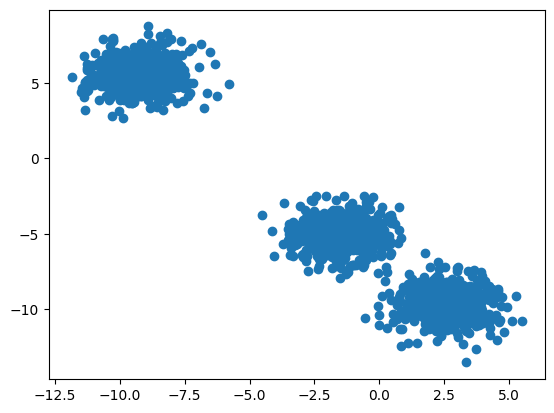

In [80]:
plt.scatter(X[:,0],X[:,1])

In [22]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

In [87]:
mall_df = df.get_mall_df()
mall_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
#seeing the data
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
X=mall_df.iloc[:,[3,4]].values

[269981.28, 183069.17582751293, 132485.3805668016, 73880.64496247194, 66991.11153756353, 37239.83554245604, 30227.606513152015, 28081.012638188364, 21794.8856090982, 20035.137783976068]


Text(0.5, 1.0, 'elbow_method')

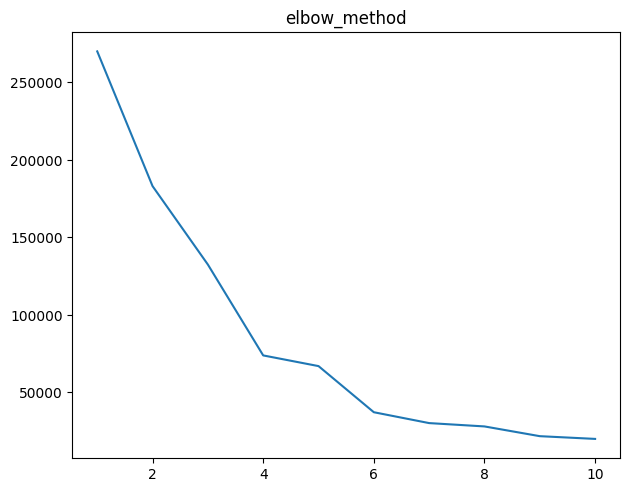

In [35]:
#elbow method

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

print(wcss)
plt.plot(range(1,11),wcss)
plt.tight_layout()
plt.title('elbow_method')      

In [65]:
km = KMeans(n_clusters=6)
y_km=km.fit_predict(X)

In [63]:
y_km

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

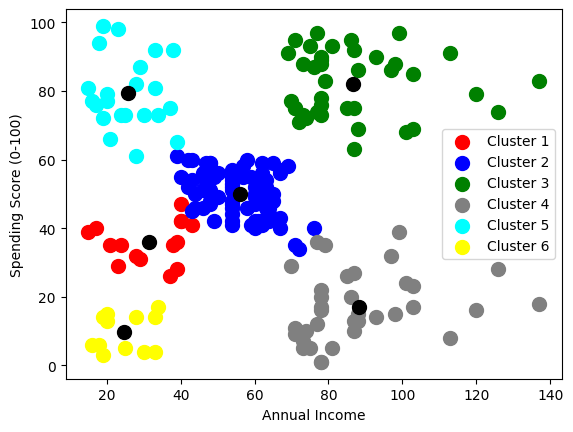

In [66]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='red',s=100,label ='Cluster 1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='blue',s=100,label ='Cluster 2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='green',s=100,label ='Cluster 3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='grey',s=100,label ='Cluster 4')
plt.scatter(X[y_km==4,0],X[y_km==4,1],c='cyan',s=100,label ='Cluster 5')
plt.scatter(X[y_km==5,0],X[y_km==5,1],c='yellow',s=100,label ='Cluster 6') 
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='black',s = 100)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score (0-100)")
plt.legend()

## Hierarchical Clustering

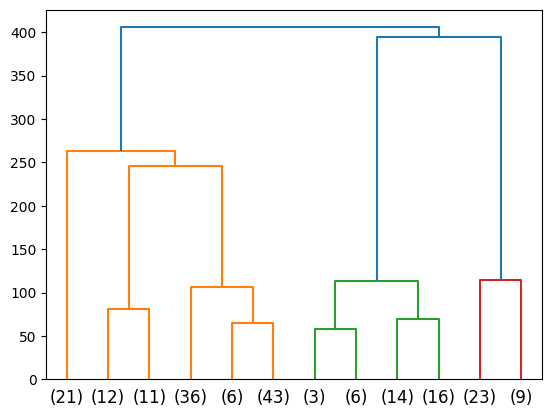

In [85]:
from scipy.cluster.hierarchy import dendrogram,linkage
dendrogram(linkage(X,method='ward'),truncate_mode='lastp',p=12)
plt.show()

In [125]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=6,linkage='ward')
labels = model.fit_predict(X)

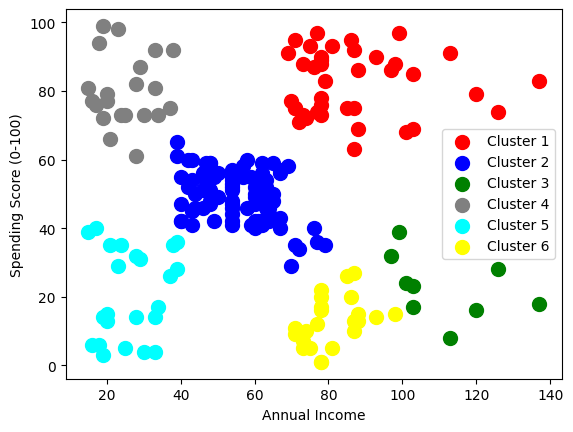

In [126]:
plt.scatter(X[labels==0,0],X[labels==0,1],c='red',s=100,label ='Cluster 1')
plt.scatter(X[labels==1,0],X[labels==1,1],c='blue',s=100,label ='Cluster 2')
plt.scatter(X[labels==2,0],X[labels==2,1],c='green',s=100,label ='Cluster 3')
plt.scatter(X[labels==3,0],X[labels==3,1],c='grey',s=100,label ='Cluster 4')
plt.scatter(X[labels==4,0],X[labels==4,1],c='cyan',s=100,label ='Cluster 5')
plt.scatter(X[labels==5,0],X[labels==5,1],c='yellow',s=100,label ='Cluster 6') 
plt.xlabel("Annual Income")
plt.ylabel("Spending Score (0-100)")
plt.legend()

## HDBSCAN

In [84]:
import hdbscan

In [128]:
clustererr = hdbscan.HDBSCAN(min_cluster_size=10,min_samples=4)
labelshdb = clustererr.fit_predict(X)
print(labelshdb)

[-1  3  1  3 -1  3  1 -1  1  3  1 -1  1  3  1  3 -1  3 -1 -1 -1  3  1  3
  1  3 -1 -1 -1 -1  1  3  1 -1  1  3 -1  3 -1 -1  4 -1  4  4 -1  3  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  0  2  0  4  0  2  0  2  0  4  0  2  0  2  0  2  0  2  0  4  0
  2  0  4  0  2  0  2  0  2  0  2  0  2  0  2  0  4  0  2  0  2  0  2  0
 -1 -1  2  0  2  0  2  0  2  0  2  0 -1  0  2  0 -1  0  2 -1  2  0 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


c:\Users\Yash\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Yash\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


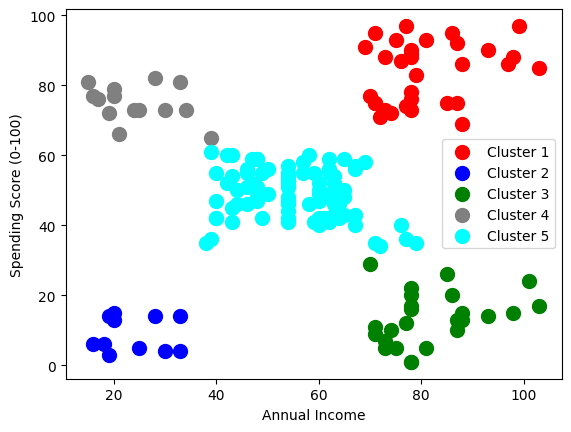

In [130]:
plt.scatter(X[labelshdb==0,0],X[labelshdb==0,1],c='red',s=100,label ='Cluster 1')
plt.scatter(X[labelshdb==1,0],X[labelshdb==1,1],c='blue',s=100,label ='Cluster 2')
plt.scatter(X[labelshdb==2,0],X[labelshdb==2,1],c='green',s=100,label ='Cluster 3')
plt.scatter(X[labelshdb==3,0],X[labelshdb==3,1],c='grey',s=100,label ='Cluster 4')
plt.scatter(X[labelshdb==4,0],X[labelshdb==4,1],c='cyan',s=100,label ='Cluster 5')
#plt.scatter(X[labelshdb==5,0],X[labelshdb==5,1],c='yellow',s=100,label ='Cluster 6') 
plt.xlabel("Annual Income")
plt.ylabel("Spending Score (0-100)")
plt.legend()

## Meanshift

In [107]:
from sklearn.cluster import MeanShift

In [131]:
ms = MeanShift(bandwidth=20)
labels=ms.fit_predict(X)
print(labels)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 6 5 6 5 6 5 6 5 6 5 6 5]


In [136]:
ms_cluster_centers = ms.cluster_centers_

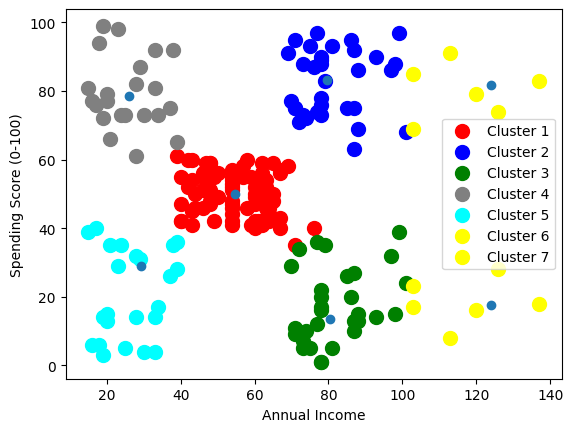

In [137]:
plt.scatter(X[labels==0,0],X[labels==0,1],c='red',s=100,label ='Cluster 1')
plt.scatter(X[labels==1,0],X[labels==1,1],c='blue',s=100,label ='Cluster 2')
plt.scatter(X[labels==2,0],X[labels==2,1],c='green',s=100,label ='Cluster 3')
plt.scatter(X[labels==3,0],X[labels==3,1],c='grey',s=100,label ='Cluster 4')
plt.scatter(X[labels==4,0],X[labels==4,1],c='cyan',s=100,label ='Cluster 5')
plt.scatter(X[labels==5,0],X[labels==5,1],c='yellow',s=100,label ='Cluster 6')
plt.scatter(X[labels==6,0],X[labels==6,1],c='yellow',s=100,label ='Cluster 7') 
plt.xlabel("Annual Income")
plt.ylabel("Spending Score (0-100)")
plt.scatter(ms_cluster_centers[:,0],ms_cluster_centers[:,1])
plt.legend()